# Calculating Hourly Entries and Exits
# Quizz 17

In [71]:
import numpy as np
import pandas as pd

values = np.array([1, 3, 2, 4, 1, 6, 4])
example_df = pd.DataFrame({
    'value': values,
    'even': values % 2 == 0,
    'above_three': values > 3 
}, index=['a', 'b', 'c', 'd', 'e', 'f', 'g'])

In [72]:
print values
print "---"
print example_df

[1 3 2 4 1 6 4]
---
  above_three   even  value
a       False  False      1
b       False  False      3
c       False   True      2
d        True   True      4
e       False  False      1
f        True   True      6
g        True   True      4


In [73]:
# Change False to True for each block of code to see what it does

# Standardize each group
if True:
    def standardize(xs):
        return (xs - xs.mean()) / xs.std()
    grouped_data = example_df.groupby('even')
    print grouped_data['value'].apply(standardize)

a   -0.577350
b    1.154701
c   -1.224745
d    0.000000
e   -0.577350
f    1.224745
g    0.000000
Name: value, dtype: float64


In [74]:
grouped_data.groups

{False: Index([u'a', u'b', u'e'], dtype='object'),
 True: Index([u'c', u'd', u'f', u'g'], dtype='object')}

In [81]:
# Find second largest value in each group
if True:
    def second_largest(xs):
        sorted_xs = xs.sort(inplace=False, ascending=False)
        return sorted_xs.iloc[1]
    grouped_data = example_df.groupby('even')
    print grouped_data['value'].apply(second_largest)

even
False    1
True     4
Name: value, dtype: int64


C:\Users\Diallo\Anaconda2\envs\DAND\lib\site-packages\ipykernel\__main__.py:4: FutureWarning: sort is deprecated, use sort_values(inplace=True) for INPLACE sorting


In [82]:
# --- Quiz ---
# DataFrame with cumulative entries and exits for multiple stations
ridership_df = pd.DataFrame({
    'UNIT': ['R051', 'R079', 'R051', 'R079', 'R051', 'R079', 'R051', 'R079', 'R051'],
    'TIMEn': ['00:00:00', '02:00:00', '04:00:00', '06:00:00', '08:00:00', '10:00:00', '12:00:00', '14:00:00', '16:00:00'],
    'ENTRIESn': [3144312, 8936644, 3144335, 8936658, 3144353, 8936687, 3144424, 8936819, 3144594],
    'EXITSn': [1088151, 13755385,  1088159, 13755393,  1088177, 13755598, 1088231, 13756191,  1088275]
})

In [83]:
def get_hourly_entries_and_exits(entries_and_exits):
    '''
    Fill in this function to take a DataFrame with cumulative entries
    and exits and return a DataFrame with hourly entries and exits.
    The hourly entries and exits should be calculated separately for
    each station (the 'UNIT' column).
    
    Hint: Take a look at the `get_hourly_entries_and_exits()` function
    you wrote in a previous quiz, DataFrame Vectorized Operations. If
    you copy it here and rename it, you can use it and the `.apply()`
    function to help solve this problem.
    '''
    def shft(data):
        return (data - data.shift(1)).fillna(0)
    
    grouped_data = entries_and_exits.groupby('UNIT')
    ridership_byStn = grouped_data['ENTRIESn','EXITSn'].apply(shft)
    return ridership_byStn

In [84]:
rider =  get_hourly_entries_and_exits(ridership_df)
print rider

   ENTRIESn  EXITSn
0       0.0     0.0
1       0.0     0.0
2      23.0     8.0
3      14.0     8.0
4      18.0    18.0
5      29.0   205.0
6      71.0    54.0
7     132.0   593.0
8     170.0    44.0


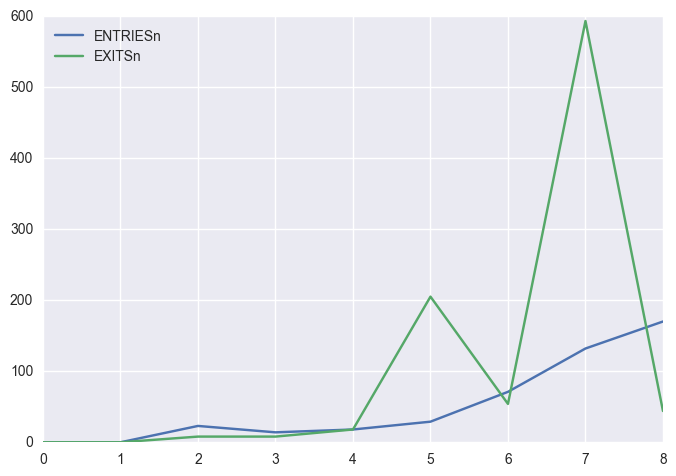

In [85]:
import seaborn as sns
import matplotlib.pyplot as plt

rider.plot()
plt.show()

In [ ]:
def get_hourly_entries_and_exits2(entries_and_exits):
    '''
    Fill in this function to take a DataFrame with cumulative entries
    and exits and return a DataFrame with hourly entries and exits.
    The hourly entries and exits should be calculated separately for
    each station (the 'UNIT' column).
    
    Hint: Take a look at the `get_hourly_entries_and_exits()` function
    you wrote in a previous quiz, DataFrame Vectorized Operations. If
    you copy it here and rename it, you can use it and the `.apply()`
    function to help solve this problem.
    '''
    def shft(data):
        return (data - data.shift(1)).fillna(0)
    
    grouped_data = entries_and_exits.groupby('UNIT')
    ridership_byStn = grouped_data['EXITSn'].apply(shft)
    return ridership_byStn

rider2 =  get_hourly_entries_and_exits2(ridership_df)
rider2.plot()
plt.show()